In [17]:
%pylab inline
from utils import *

set_paper_rcs()

date = '05-19-080157'
res_dir = '../results/'+date+'/'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(<matplotlib.axes._axes.Axes at 0x110d3fe48>,
 <matplotlib.figure.Figure at 0x10e14cfd0>)

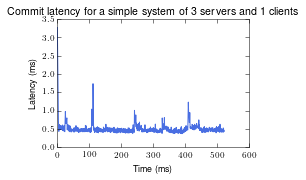

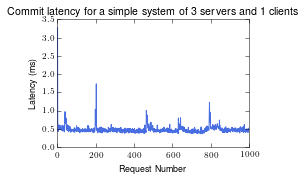

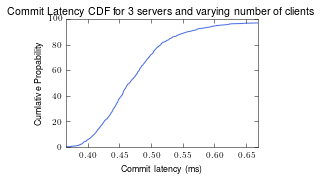

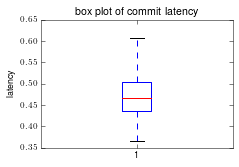

In [18]:
# SIMPLE: a simple 3 server and 1 client system

simple = read_results_file(res_dir+'simple/results/latency_1.csv')

draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['time'],simple['latency'])

draw_line_graph('Request Number', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['reqs'],simple['latency'])
draw_cdf('Commit latency (ms)', 
         'Commit Latency CDF for 3 servers and varying number of clients',
         simple['latency'])

draw_boxplot("latency","box plot of commit latency",simple['latency'])

In [19]:
# LOAD TESTING DATA 


clients = range(1,25)
latency = {}
latency_by_client = {}
req_by_client = {}
time_by_client = {}

for c in clients:
    latency[c]=[]
    latency_by_client[c] = {}
    req_by_client[c] = {}
    time_by_client[c] = {}
    for client in range(1,c+1):
        res = read_results_file(res_dir+'load/'+str(c)+'c/results/latency_'+str(client)+'.csv')
        latency_by_client[c][client] = res['latency']
        latency[c] = latency[c] + (res['latency'])
        req_by_client[c][client] = res['reqs']
        time_by_client[c][client] = res['time']     

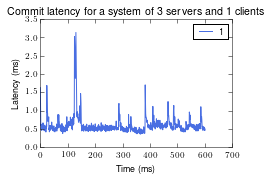

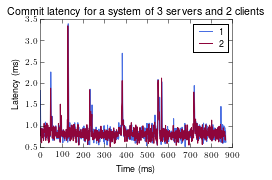

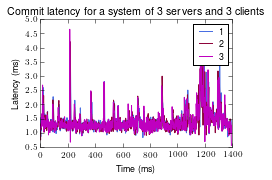

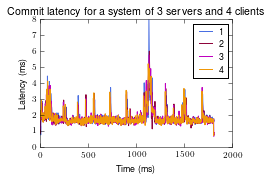

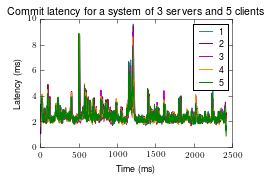

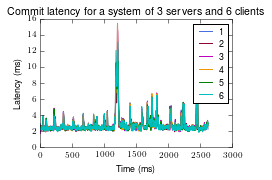

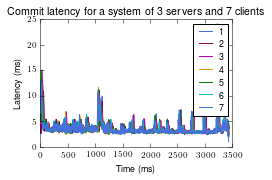

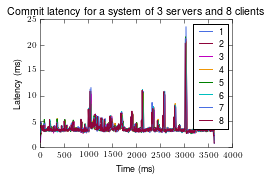

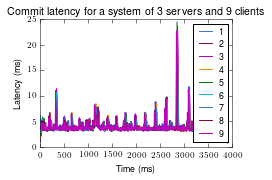

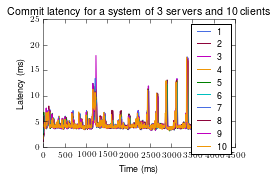

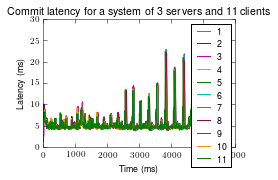

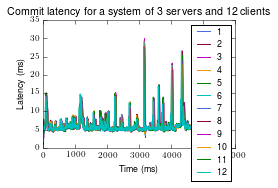

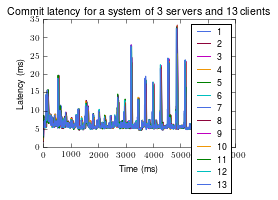

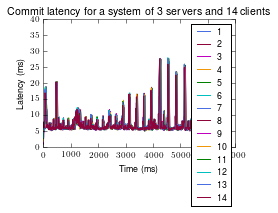

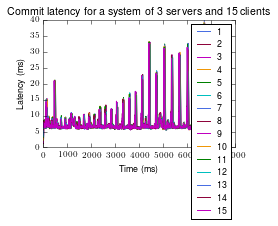

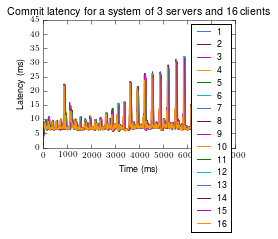

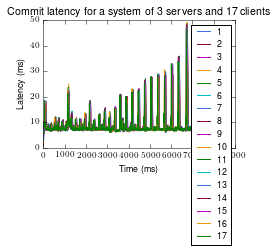

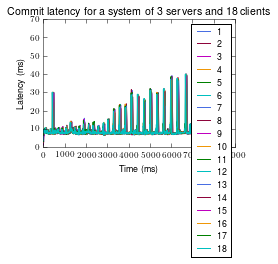

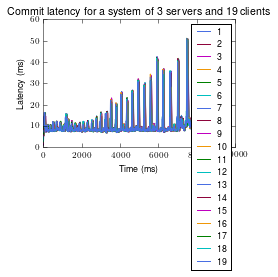

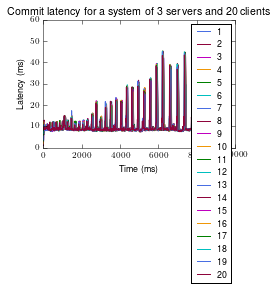

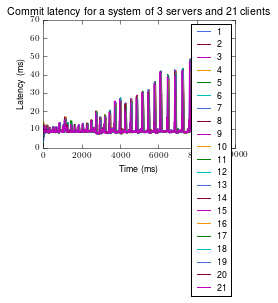

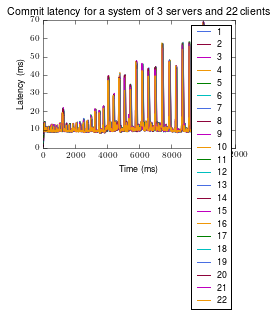

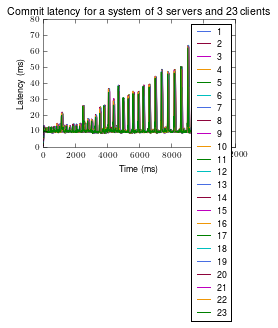

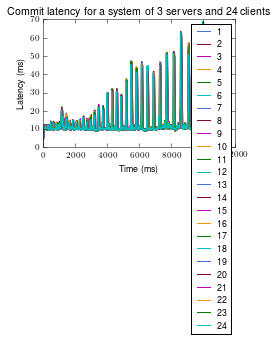

In [20]:
# plotting latency over actual time (for X client systems)

for c in clients:
    draw_lines_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a system of 3 servers and '+str(c)+' clients', 
                    time_by_client[c],latency_by_client[c],range(1,c+1))



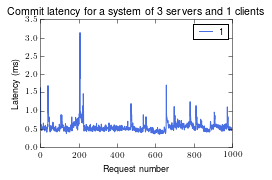

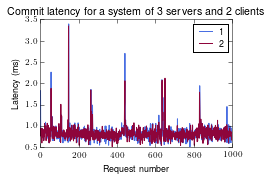

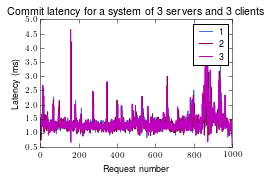

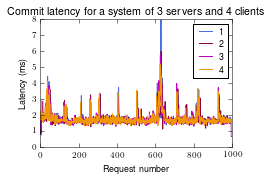

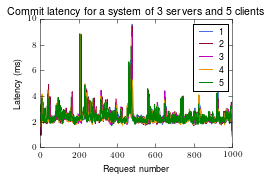

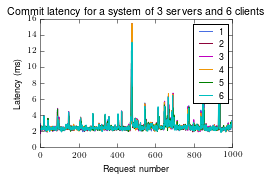

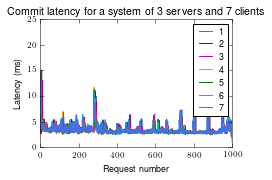

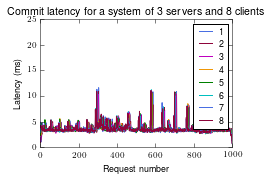

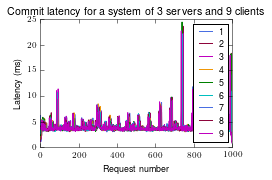

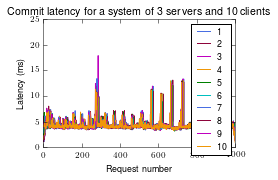

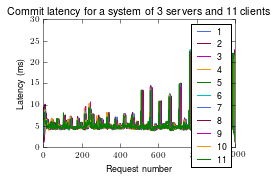

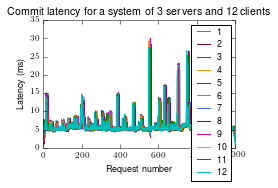

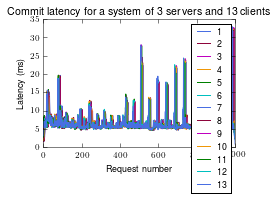

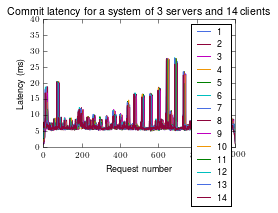

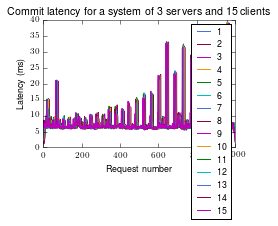

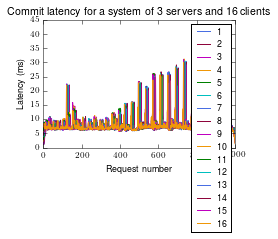

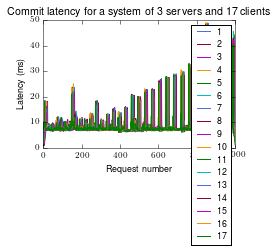

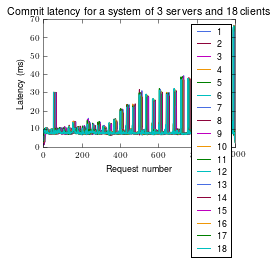

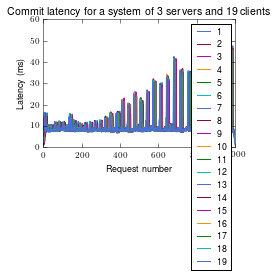

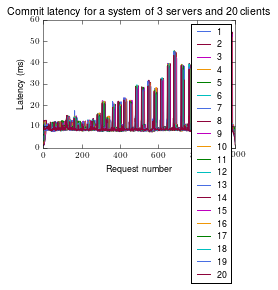

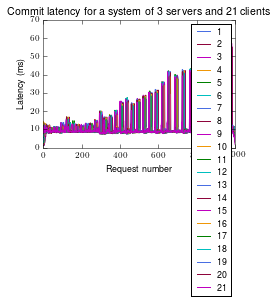

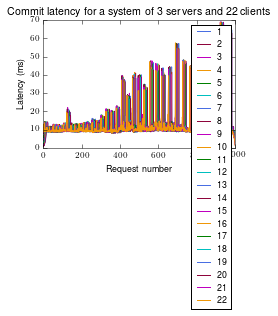

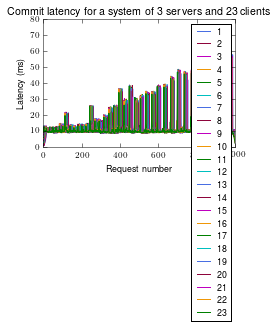

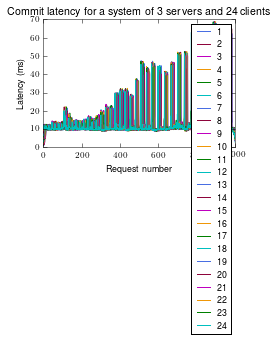

In [21]:
# plotting latency over request time (for X client system)

for c in clients:
    draw_lines_graph('Request number','Latency (ms)','Commit latency for a system of 3 servers and '+str(c)+' clients',
                    req_by_client[c], latency_by_client[c], range(1,c+1))


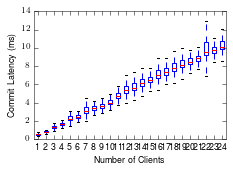

In [22]:
axes, fig = draw_boxplots("Number of Clients","Commit Latency (ms)","",latency,clients)
fig_to_file(fig,"load_latency_boxplot","pdf")

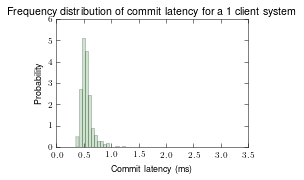

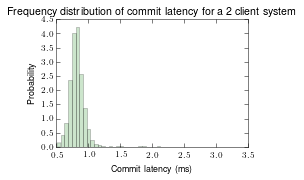

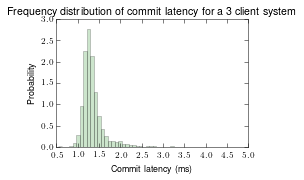

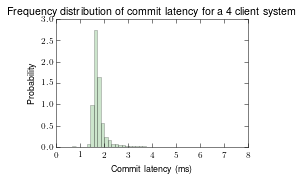

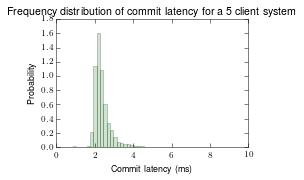

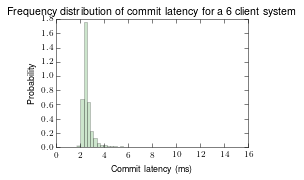

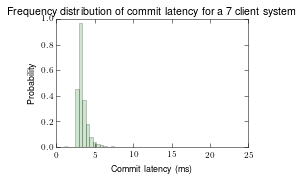

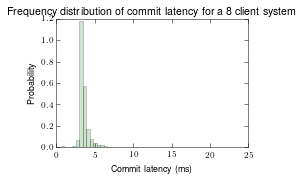

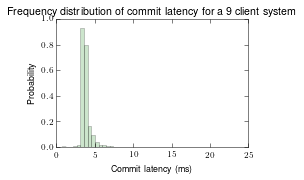

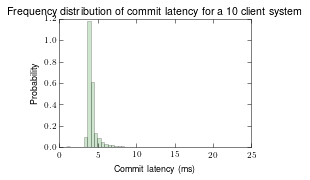

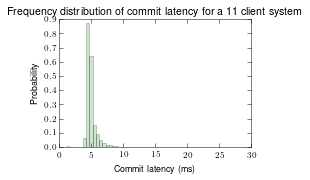

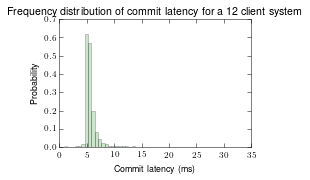

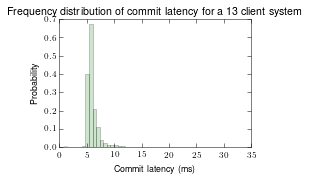

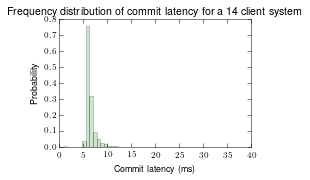

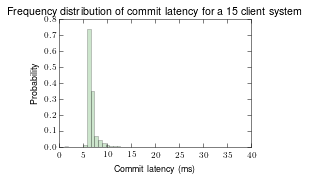

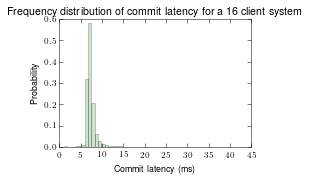

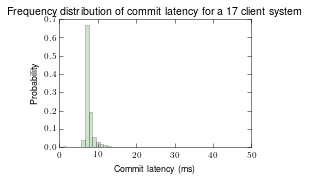

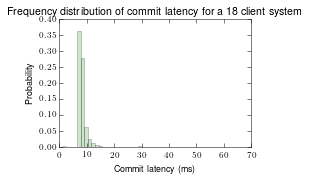

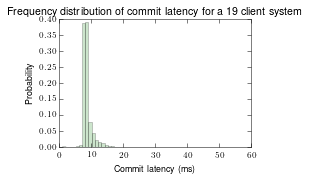

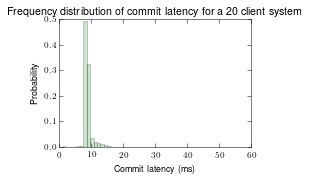

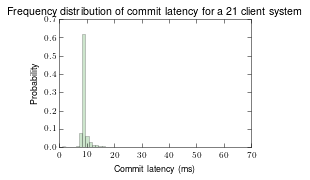

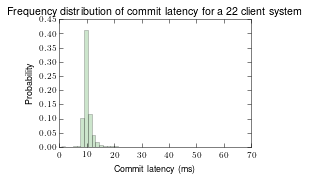

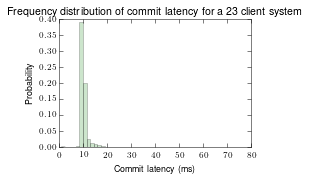

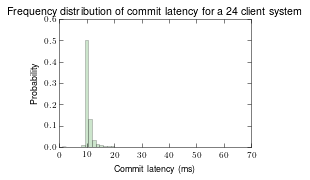

In [23]:
# plot latency distribution (for X client system)

for c in clients:
    draw_histo('Commit latency (ms)',
               'Frequency distribution of commit latency for a '+str(c)+' client system',
               latency[c],50)



(<matplotlib.axes._axes.Axes at 0x10a671668>,
 <matplotlib.figure.Figure at 0x10e081240>)

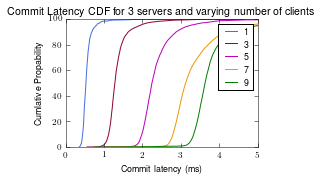

In [24]:
# plot simple CFD

draw_cdfs('Commit latency (ms)', 
         'Commit Latency CDF for 3 servers and varying number of clients',
         latency,[1,3,5,7,9])



1000 601.0871919999943
2000 870.6674629999895
3000 1396.343532000003
4000 1812.1381329999906
5000 2423.655838000002
6000 2624.1221029999906
7000 3445.2744499999994
8000 3631.29238099998
9000 3907.940907000011
10000 4323.820527999998
11000 5098.523484999987
12000 5855.91495700001
13000 6209.745230999999
14000 6722.755852999995
15000 7012.678201000028
16000 7651.179241999955
17000 8058.870394999985
18000 8670.975345999977
19000 9038.103170999988
20000 9281.860472000006
21000 9642.555324
22000 10796.349322000025
23000 10737.95210899999
24000 11302.675061000002


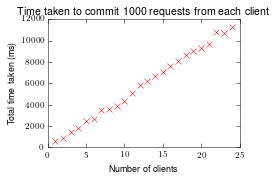

In [25]:
# calc throughput per client
throughput_by_client = {}
time_taken = []
throughput=[]

for c in clients:
    throughput_by_client[c] = {}
    reqs = 0
    time = 0
    for client in range(1,c+1):
        reqs += req_by_client[c][client][-1]
        new_time = time_by_client[c][client][-1]
        if new_time >time:
            time=new_time
    print(reqs,time)
    time_taken.append(time)
    throughput.append(reqs*1000/time)
    
_,fig = draw_simple_plot('Number of clients','Total time taken (ms)','Time taken to commit 1000 requests from each client',clients,time_taken)
fig_to_file(fig,"load_timetaken","pdf")

range(1, 25)
[1663.6521511508258, 2297.088251246646, 2148.4684329099564, 2207.3372482803, 2062.9991773609217, 2286.4789687722932, 2031.7684705785923, 2203.07239424135, 2303.00309400251, 2312.7694443472988, 2157.4873651876546, 2049.210087256392, 2093.4836320018426, 2082.4793144544396, 2138.983077515372, 2091.180913939448, 2109.4767835635394, 2075.891036676008, 2102.2110104877033, 2154.7404273456514, 2177.845943775059, 2037.7258408238033, 2141.935423675675, 2123.391132671968]
[0.5269919999999999, 0.80967049999999996, 1.281795, 1.6732865000000001, 2.2475044999999998, 2.421217, 3.1265809999999998, 3.3743530000000002, 3.63144, 4.0068915000000001, 4.711112, 5.3362230000000004, 5.6448429999999998, 6.1090564999999994, 6.4408034999999995, 7.0744899999999999, 7.3370475000000006, 7.7813894999999995, 8.1540010000000009, 8.4897445000000005, 8.8421210000000006, 9.5309205000000006, 9.7386330000000001, 10.149562]


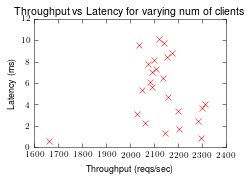

In [26]:
# plotting throughput vs latency

medium_latency=[]

for c in clients:
    medium_latency.append(np.percentile(latency[c],50))
    

draw_simple_plot('Throughput (reqs/sec)','Latency (ms)','Throughput vs Latency for varying num of clients',throughput,medium_latency)
print(clients)
print(throughput)
print(medium_latency)


(1, 14)

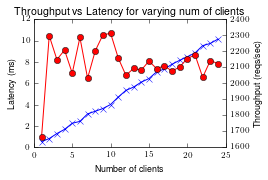

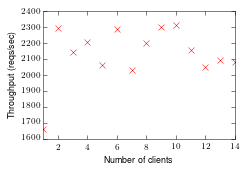

In [27]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Number of clients')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying num of clients')

axes.plot(clients, medium_latency,"bx-") 

axes2 = axes.twinx()
axes2.set_ylabel('Throughput (reqs/sec)')
axes2.plot(clients, throughput,"ro-")

axes, fig = draw_simple_plot('Number of clients','Throughput (reqs/sec)','',clients, throughput)
axes.set_xlim([1,14])


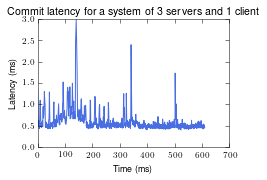

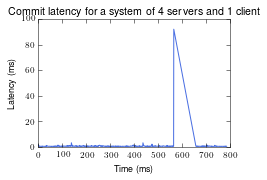

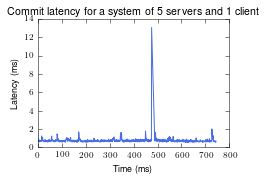

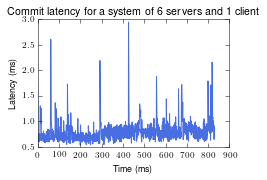

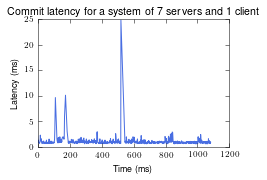

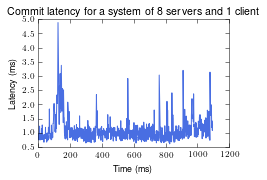

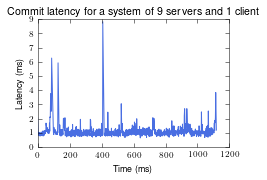

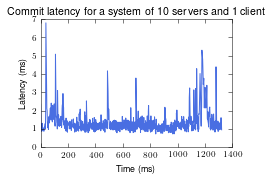

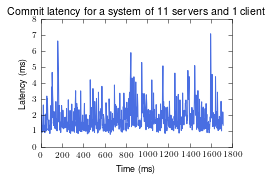

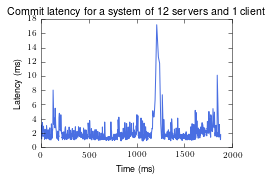

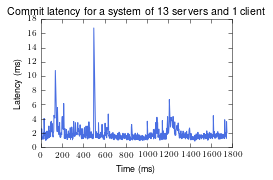

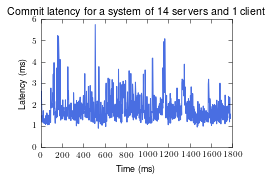

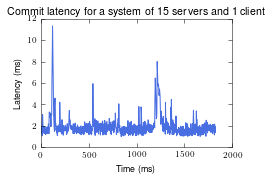

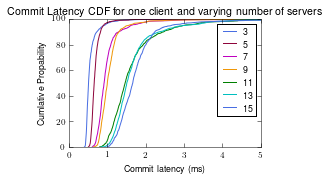

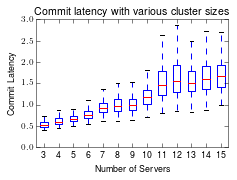

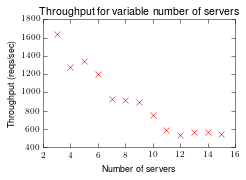

In [28]:
# SCALE: for other numbers of servers

serv_latency = {}
serv_throughput = []
servs = range(3,16)
servs_less = range(3,16,2)


for s in servs:
    scale = read_results_file(res_dir+'scale/'+str(s)+'s/results/latency_1.csv')
    serv_latency[s]= scale["latency"]
    serv_throughput.append(scale["reqs"][-1]*1000/scale["time"][-1])
    draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a system of '+str(s)+' servers and 1 client', 
                   scale['time'],scale['latency'])
    
draw_cdfs('Commit latency (ms)','Commit Latency CDF for one client and varying number of servers',serv_latency,servs_less)

_, fig2 = draw_boxplots("Number of Servers","Commit Latency","Commit latency with various cluster sizes",serv_latency,servs)
fig_to_file(fig2,"scale_latency_boxplot","pdf")
_, fig3 = draw_simple_plot("Number of servers","Throughput (reqs/sec)","Throughput for variable number of servers",servs,serv_throughput)
fig_to_file(fig3,"scale_throughput","pdf")

(<matplotlib.axes._axes.Axes at 0x10c49c860>,
 <matplotlib.figure.Figure at 0x10aab4b00>)

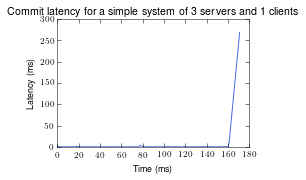

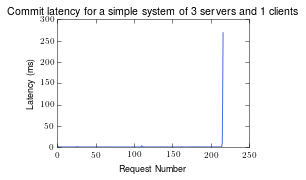

In [29]:
# FAILURE: testing master failure in a 5 node system

simple = read_results_file(res_dir+'failure/results/latency_1.csv')

axes = draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['time'],simple['latency'])

#axes.axvline(60,0,7)

draw_line_graph('Request Number', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['reqs'],simple['latency'])

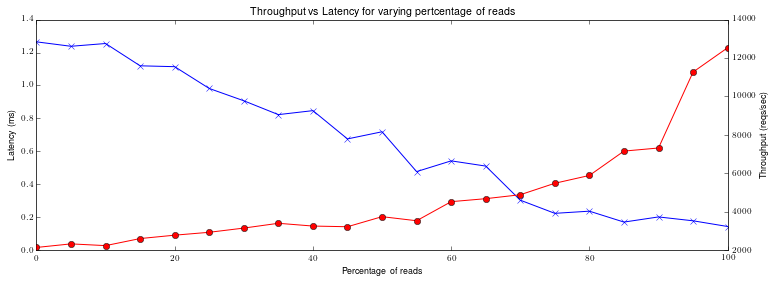

In [30]:
# READ: how does special treatment of read requests improve throughput and latency

read_latency = {}
read_time = {}

read_medium_latency=[]
read_throughput=[]

perts = range(0,101,5)

for pert in perts:
    read_latency[pert] = []
    time = 0
    reqs = 0
    for client in range(1,4):
        res = read_results_file(res_dir+'read/'+str(pert)+'r/results/latency_'+str(client)+'.csv')
        read_latency[pert] = read_latency[pert] + (res['latency'])
        if time < res['time'][-1]:
            time = res['time'][-1]
        reqs += res['reqs'][-1]
    read_time[pert] = res['time']   
    read_throughput.append(reqs*1000/time)
    read_medium_latency.append(np.percentile(read_latency[pert],50))
        
fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Percentage of reads')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying pertcentage of reads')

axes.plot(perts, read_medium_latency,"bx-") 

axes2 = axes.twinx()
axes2.set_ylabel('Throughput (reqs/sec)')
axes2.plot(perts, read_throughput,"ro-") 
fig_to_file(fig,"read","pdf")

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
[6.7697395, 1.961263, 2.0696570000000003, 2.1688195000000001, 2.0448504999999999, 2.1527504999999998, 2.1157304999999997, 2.19645, 2.2220035, 2.2639310000000004, 2.297844, 2.2397450000000001, 2.325755, 2.3919144999999999, 2.1975519999999999, 2.1598160000000002, 2.0741420000000002, 2.0781179999999999, 2.1894144999999998, 2.038678, 2.0268230000000003]


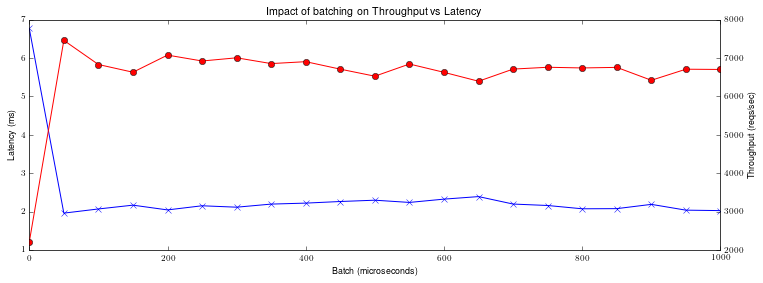

In [31]:
# BATCH: how does batching improve throughput

def batch():
    latency = {}
    time = {}

    medium_latency=[]
    throughput=[]

    var = list(range(0,1000+1,50))

    for v in var:
        latency[v] = []
        time[v] = []
        total_reqs = 0
        max_time = 0
        for c in range(1,16+1):
            res = read_results_file(res_dir+'batch/'+str(v)+'r/results/latency_'+str(c)+'.csv')
            latency[v] = latency[v] + res['latency']
            time[v] = time[v] + res['time']
            total_reqs = total_reqs + res['reqs'][-1]
            if res['time'][-1] > max_time:
                max_time=res['time'][-1]
        throughput.append(total_reqs*1000/max_time)
        medium_latency.append(np.percentile(latency[v],50))
    print(var)
    print(medium_latency)

    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel('Batch (microseconds)')
    axes.set_ylabel('Latency (ms)')
    axes.set_title('Impact of batching on Throughput vs Latency')

    axes.plot(var, medium_latency,"bx-") 

    axes2 = axes.twinx()
    axes2.set_ylabel('Throughput (reqs/sec)')
    axes2.plot(var, throughput,"ro-")
    
    fig_to_file(fig,"batch","pdf")
 
batch()